# Data Loading

## Data loading with Pandas

In [20]:
import pandas as pd

In [31]:
# subset of the 1993 US census
data = pd.read_csv("data/adult.csv", index_col=0)

In [32]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Simple analysis

In [33]:
data.shape

(32561, 14)

In [34]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [35]:
#counting number of unique values in income column
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

income
 <=50K    AxesSubplot(0.125,0.125;0.775x0.755)
 >50K     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

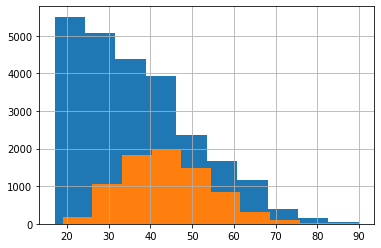

In [44]:
%matplotlib inline
data.groupby("income").age.hist()

# Splitting into training and test data

In [45]:
X = data.drop("income", axis=1) #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
y = data.income

In [46]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [47]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) #default is 25-75 split

In [49]:
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
24973,31,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
28631,40,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,0,0,40,United-States
7283,37,Self-emp-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States
14660,41,Private,HS-grad,9,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States
2082,40,Private,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,60,United-States


In [50]:
X_train.shape

(24420, 13)

# Exercise I 
Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

## Load Datasets from ScikitLearn

Get some data to play with

In [1]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digits['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [9]:
digits.data[0].shape

(64,)

In [10]:
digits.data[0].reshape(8, 8).shape

(8, 8)

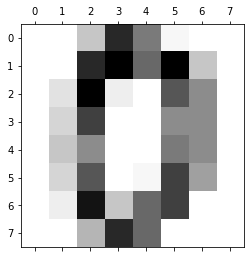

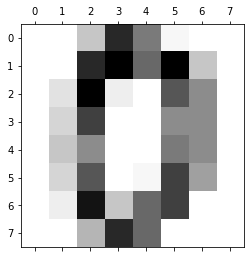

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook <- interactive interface
#plt.matshow: Display an array as a matrix in a new figure window.
plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)
plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Blues)
#plt.imshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)

In [13]:
digits.target[0]

0

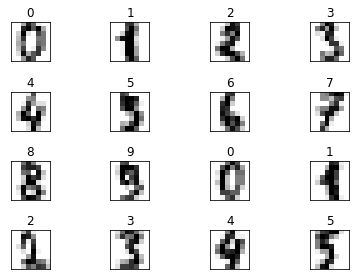

In [18]:
'''
plt.subplots() is a function that returns a tuple containing a
figure and axes object(s). Thus when using fig, ax = plt.subplots()
you unpack this tuple into the variables fig and ax. Having fig is
useful if you want to change figure-level attributes or save the
figure as an image file later (e.g. with fig.savefig('yourfilename.png')).
'''

fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(digits.data, digits.target, axes.ravel()):
    ax.set_title(y) #Set a title for the axes.
    ax.imshow(x.reshape(8, 8), cmap="gray_r") #Display an image, i.e. data on a 2D regular raster.
    ax.set_xticks(())#Set the xaxis' tick locations.
    ax.set_yticks(())
plt.tight_layout()

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data to get going

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target, test_size=0.25, random_state=1)

In [20]:
digits.data.shape

(1797, 64)

In [21]:
X_train.shape

(1347, 64)

In [22]:
X_test.shape

(450, 64)

# Exercise II

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``digits``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.
